In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Caracterización Ventilador KKK
- El JN presente busca caracterizar variables de operación del ventilador.
- Tiempos soplado general, distribución de tiempos.
- Lecturas de flujo O2.
- Lectuas sensores RMS para análisis de severidad.

In [2]:
df = pd.read_csv('aumento_vib_kkk_2_horizontales.csv')
print(df.columns)

Index(['date_selected_start', 'n_lavado', 'date_selected_start.1',
       'date_selected_on', 'date_selected_off', 'date_selected_finish',
       'duracion_timestamp', 'rpm_perfil', 'vib_1_mean', 'vib_2_mean',
       'vib_1h_mean', 'vib_2h_mean', 'vib_3h_mean', 'vib_4h_mean', 'flow_mean',
       'vib_1_std', 'vib_2_std', 'vib_1h_std', 'vib_2h_std', 'vib_3h_std',
       'vib_4h_std', 'flow_std', 'slope', 'intercept', 'r_value', 'p_value',
       'std_err', 'a2', 'a1', 'a0'],
      dtype='object')


In [3]:
df

,date_selected_start,n_lavado,date_selected_start.1,date_selected_on,date_selected_off,date_selected_finish,duracion_timestamp,rpm_perfil,vib_1_mean,vib_2_mean,...,vib_4h_std,flow_std,slope,intercept,r_value,p_value,std_err,a2,a1,a0
0,2019-05-06 13:53:20,0,2019-05-06 13:53:20,2019-05-06 13:53:20,2019-05-06 14:27:35,2019-05-06 14:33:25,40.083333,1485.0,12.331561,7.527151,...,0.192211,10757.640439,0.913581,0.417002,0.955814,7.043805e-38,0.034074,0.000097,-0.023425,3.482068
1,2019-05-06 15:57:50,1,2019-05-06 15:57:50,2019-05-06 15:58:55,2019-05-06 16:28:30,2019-05-06 16:34:05,36.250000,1485.0,10.998796,6.667322,...,0.279212,8602.777835,0.903481,0.463023,0.950516,1.035180e-34,0.036628,0.000076,-0.016101,3.225984
2,2019-05-06 16:44:20,2,2019-05-06 16:44:20,2019-05-06 16:45:40,2019-05-06 17:30:50,2019-05-06 17:36:35,52.250000,1485.0,12.343553,7.478319,...,0.180719,10090.668350,0.920648,0.414385,0.959504,1.379766e-38,0.033021,0.000099,-0.022913,3.592270
3,2019-05-06 17:46:50,3,2019-05-06 17:46:50,2019-05-06 17:48:00,2019-05-06 18:18:25,2019-05-06 18:24:05,37.250000,1485.0,12.755871,7.686582,...,0.259862,11365.864102,0.898657,0.542936,0.947975,1.600517e-34,0.037147,0.000104,-0.024566,3.829443
4,2019-05-06 18:59:30,4,2019-05-06 18:59:30,2019-05-06 19:00:55,2019-05-06 19:24:25,2019-05-06 19:30:10,30.666667,1485.0,13.081992,7.891386,...,0.243260,9784.849085,0.899653,0.570958,0.948500,3.630797e-35,0.036707,0.000075,-0.011106,3.014747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31563,2023-03-13 23:23:25,31575,2023-03-13 23:23:25,2023-03-13 23:24:25,2023-03-14 00:18:40,2023-03-14 00:24:25,61.000000,1485.0,35.128029,23.431296,...,0.392218,8621.889428,0.959123,0.469305,0.979348,3.023640e-48,0.024190,0.000287,-0.054819,3.750636
31564,2023-03-14 00:31:05,31576,2023-03-14 00:31:05,2023-03-14 00:32:20,2023-03-14 01:03:50,2023-03-14 01:09:35,38.500000,1485.0,36.520484,24.286506,...,0.356447,9967.393113,0.962069,0.436873,0.980851,2.463568e-49,0.023338,0.000287,-0.053338,3.476256
31565,2023-03-14 01:18:30,31577,2023-03-14 01:18:30,2023-03-14 01:19:45,2023-03-14 01:51:30,2023-03-14 01:57:15,38.750000,1485.0,35.949124,23.902392,...,0.274791,9773.636988,0.964615,0.400050,0.982148,2.400834e-50,0.022571,0.000291,-0.055431,3.650782
31566,2023-03-14 02:03:35,31578,2023-03-14 02:03:35,2023-03-14 02:04:45,2023-03-14 02:50:35,2023-03-14 02:56:15,52.666667,1485.0,35.699426,23.773749,...,0.312677,9732.673232,0.961211,0.435575,0.980414,2.668667e-48,0.023768,0.000300,-0.061046,4.222718


In [4]:
df.iloc[:, 13]

0        1.878706
1        1.665540
2        1.870958
3        1.926766
4        1.974613
           ...   
31563    5.856963
31564    6.071760
31565    5.971379
31566    5.941512
31567    5.826633
Name: vib_4h_mean, Length: 31568, dtype: float64

In [5]:
print("Matriz de datos")
df.shape

Matriz de datos


(31568, 30)

In [6]:
#----------------------Arreglado 4-H -----------------------------
# recorte por threshold value
threshold = 1.0
df_4h_fil = df[df.iloc[:, 13] >= threshold]

In [7]:
df_4h = df_4h_fil.vib_4h_mean
np.mean(df_4h)

2.668862286606751

In [8]:
init = df.date_selected_start[0]
fin = df.date_selected_start.iloc[-1]
print(f"Fecha inicio: {init} \nFecha término: {fin}")

Fecha inicio: 2019-05-06 13:53:20 
Fecha término: 2023-03-14 02:59:30


In [9]:
cantidad_lavados = df['n_lavado'].iloc[-1]
duracion_media = np.mean(df.duracion_timestamp)
max_duration = np.max(df.duracion_timestamp)
min_duration = np.min(df.duracion_timestamp)
std_duration = np.std(df.duracion_timestamp)

print(f'Cantidad de lavados: {cantidad_lavados}')

print(f"Tiempo promedio lavados {round(duracion_media,2)} minutos")

print(std_duration)

Cantidad de lavados: 31579
Tiempo promedio lavados 40.56 minutos
16.610244055774697


In [10]:
print('Rango normal:')
rango_min = 40.56-std_duration
rango_max = 40.56+std_duration
print(rango_min)
print(rango_max)

Rango normal:
23.949755944225306
57.1702440557747


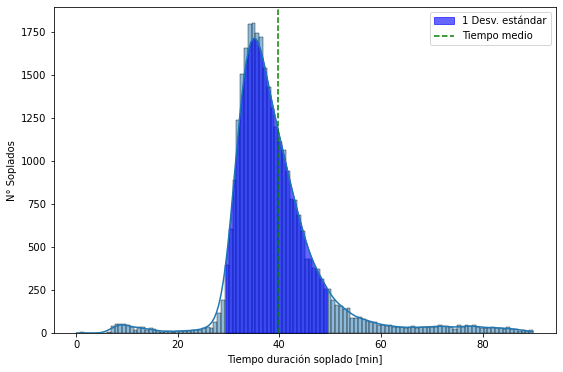

In [11]:
# Distribución soplados

filtered_data = df[df['duracion_timestamp'] < 90]['duracion_timestamp']

#estadistica básica
mean = filtered_data.mean()
std = filtered_data.std()
lower_limit = mean - std
upper_limit = mean + std

#GRAFICO
fig1 = plt.figure(figsize=(9, 6))

# Histograma con curva de densidad superpuesta
histplot = sns.histplot(data=filtered_data, kde=True, bins=120)
# Obtener las coordenadas x e y de las líneas del histograma
x = histplot.get_lines()[0].get_xdata()
y = histplot.get_lines()[0].get_ydata()

# Relleno 1 dev standar
mask = (x >= lower_limit) & (x <= upper_limit)
x_fill = x[mask]
y_fill = y[mask]
plt.fill_between(x_fill, y_fill, color='blue', alpha=0.6,label="1 Desv. estándar")

#mean
plt.axvline(39.8,color='g',linestyle='dashed', label='Tiempo medio')

# Etiquetas
plt.xlabel("Tiempo duración soplado [min]")
plt.ylabel("N° Soplados")
plt.legend()

# Mostrar
plt.savefig('Norm_lavadaos_dist.png', dpi=800)
plt.show()

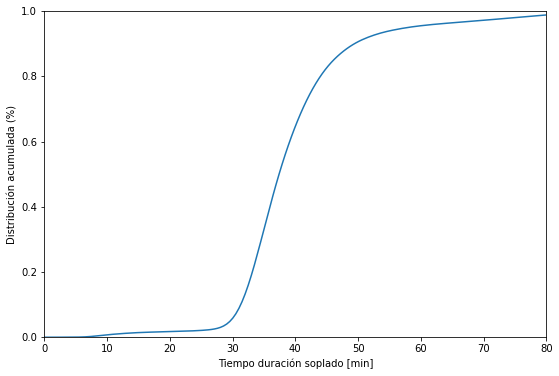

In [12]:
#Densidad acumulada

fig2 = plt.figure(figsize=(9, 6))
sns.kdeplot(data=filtered_data, cumulative=True)
plt.xlabel("Tiempo duración soplado [min]")
plt.ylabel("Distribución acumulada (%)")

plt.ylim(0,1)
plt.xlim(0,80)

plt.savefig('Ac_lavados.png', dpi=800)
plt.show()

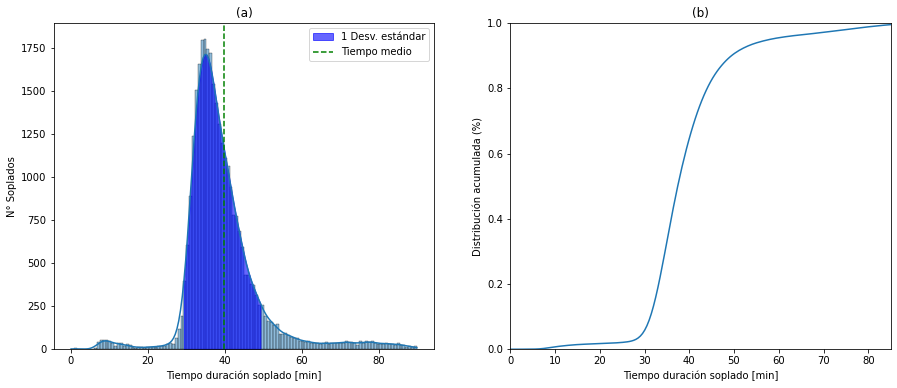

In [13]:
# Plot ambas figuras
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(data=filtered_data, kde=True, bins=120, ax=axes[0])
axes[0].set_title('(a)')
axes[0].fill_between(x_fill, y_fill, color='blue', alpha=0.6, label="1 Desv. estándar")
axes[0].axvline(39.8, color='g', linestyle='dashed', label='Tiempo medio')
axes[0].set_xlabel("Tiempo duración soplado [min]")
axes[0].set_ylabel("N° Soplados")
axes[0].legend()

sns.kdeplot(data=filtered_data, cumulative=True, ax=axes[1])
axes[1].set_title('(b)')
axes[1].set_xlabel("Tiempo duración soplado [min]")
axes[1].set_ylabel("Distribución acumulada (%)")
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 85)

plt.savefig('soplados_info_gen.png', dpi=300)
plt.savefig('soplados_info_gen.svg', format='svg')
plt.show()

In [14]:
# Globales 3h
media_3h = np.mean(df.vib_3h_mean)
std_3h = np.mean(df.vib_3h_std)

print(f"Promedio global mean 1 = {round(media_3h,2)}")
print(f"Promedio global std 1 = {round(std_3h,2)}")

Promedio global mean 1 = 3.52
Promedio global std 1 = 0.31


In [15]:
# Globales 4h
media_4h = np.mean(df.vib_4h_mean)
std_4h = np.mean(df.vib_4h_std)

print(f"Promedio global mean 1 = {round(media_4h,3)}")
print(f"Promedio global std 1 = {round(std_4h,3)}")

Promedio global mean 1 = 2.665
Promedio global std 1 = 0.297


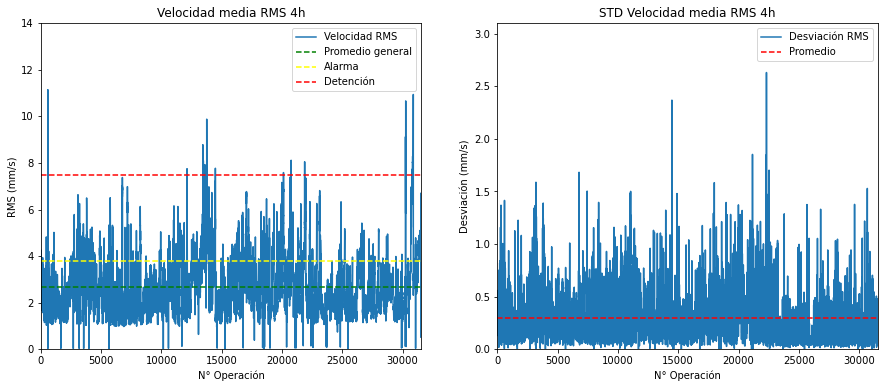

In [16]:
#Vib 4h 
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

#Graf 1
axes[0].plot(df.vib_4h_mean, label = 'Velocidad RMS')
axes[0].axhline(media_4h,color='g',linestyle='dashed',label = 'Promedio general')
axes[0].set_title("Velocidad media RMS 4h")
axes[0].set_xlim(0,31568)
axes[0].set_ylim(0,14)
axes[0].set_xlabel("N° Operación")
axes[0].set_ylabel("RMS (mm/s)")


#Graf 2
axes[1].plot(df.vib_4h_std, label = 'Desviación RMS')
axes[1].set_xlim(0,31568)
axes[1].set_ylim(0,3.1)
axes[1].axhline(std_4h,color='r',linestyle='dashed', label = 'Promedio')
axes[1].set_title("STD Velocidad media RMS 4h")
axes[1].set_xlabel("N° Operación")
axes[1].set_ylabel("Desviación (mm/s)")
axes[1].legend(loc = 'upper right')

alarma = 3.8
detencion = 7.5

# Valores alarma y parada calculados
axes[0].axhline(alarma, color = 'yellow',linestyle='dashed', label = 'Alarma')
axes[0].axhline(detencion, color = 'r',linestyle='dashed', label = 'Detención')

axes[0].legend(loc = 'upper right')

In [17]:
# Porcentajes de alarma y detención histórico
vib_4h =df. vib_4h_mean

filtrado_alarma = vib_4h[vib_4h > alarma]
filtrado_detencion = vib_4h[vib_4h > detencion]

perc_alarma = (len(filtrado_alarma)/ len(vib_4h))*100
perc_detencion = (len(filtrado_detencion)/ len(vib_4h))*100
print(f'Porcentage estado ALARMA: {round(perc_alarma,2)}')
print(f'Porcentage estado PARADA: {round(perc_detencion,2)}')

Porcentage estado ALARMA: 15.37
Porcentage estado PARADA: 0.29


In [18]:
# Globales Flujo
media_flow = np.mean(df.flow_mean)
std_flow = np.mean(df.flow_std)

print(f"Promedio global mean 1 = {round(media_flow,2)}")
print(f"Promedio global std 1 = {round(std_flow,2)}")

Promedio global mean 1 = 190079.16
Promedio global std 1 = 9210.08


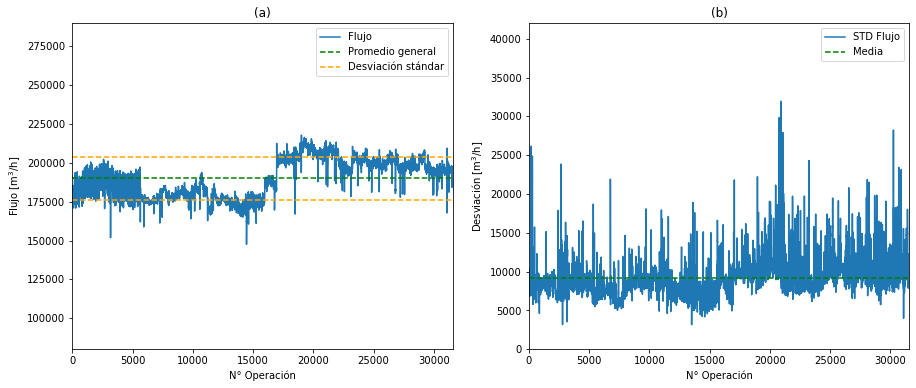

In [19]:
# Limpieza FLOW


#Desviaciones
dev_flow = np.std(df.flow_mean)
sl_flow = media_flow+dev_flow
il_flow = media_flow-dev_flow

#Rolling_mean 4 MUestras
rolling_flow = (df.flow_mean).rolling(window = 10).mean()
rolling_f_std = (df.flow_std).rolling(window = 10).mean()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))



axes[0].plot(rolling_flow , label = 'Flujo')
axes[0].set_title("(a)")
axes[0].set_xlabel("N° Operación")
axes[0].set_ylabel("Flujo [m$^3$/h]")
axes[0].set_xlim(0,31568)
axes[0].set_ylim(80000,290000)
axes[0].axhline(media_flow,color='g',linestyle='dashed',label = 'Promedio general')



axes[1].plot(rolling_f_std, label = 'STD Flujo')
axes[1].set_title("(b)")
axes[1].set_xlabel("N° Operación")
axes[1].set_ylabel("Desviación [m$^3$/h]")
axes[1].axhline(std_flow,color='g',linestyle='dashed',label = 'Media')

axes[0].axhline(il_flow,color='orange',linestyle='dashed',label = 'Desviación stándar')
axes[0].axhline(sl_flow,color='orange',linestyle='dashed')

axes[0].legend(loc = 'upper right')
axes[1].set_xlim(0,31568)
axes[1].set_ylim(0,42000)
axes[1].legend(loc = 'upper right')

plt.savefig('flujo_O2_gen.png', dpi=300)
plt.savefig('flujo_O2.svg', format='svg')

In [20]:
#----------------------------------
print(sl_flow) 
print(il_flow) 

204095.35803082146
176062.9526084131


In [21]:
# Removiendo valores correspondientes a fallas
quitar = 200

data = df.vib_4h_mean
related_data = df.vib_4h_std

indexed_data = list(enumerate(data))

# Sort datos y remover por index
sorted_data = sorted(indexed_data, key=lambda x: x[1], reverse=True)
trimmed_data = sorted_data[quitar:]

# nuevo frame
n_vib_4h = [x[1] for x in sorted(trimmed_data, key=lambda x: x[0])]

removed_indices = [x[0] for x in sorted_data[:quitar]]
n_vib_4h_std= [related_data[i] for i in range(len(related_data)) if i not in removed_indices]


clean_1 = pd.Series(n_vib_4h)
clean_2 = pd.Series(n_vib_4h_std)

nuevo_4h = clean_1.dropna()
nuevo_4h_std = clean_2.dropna()

In [22]:
#Aplicación de media movil
data = nuevo_4h
rolling_mean = data.rolling(window = 5).mean()

In [23]:
# Globales nuevos
new_media = np.mean(rolling_mean)
new_std = np.mean(nuevo_4h_std)

print(f"Promedio global mean 1 = {round(new_media,3)}")
print(f"Promedio global std 1 = {round(new_std,3)}")

Promedio global mean 1 = 2.634
Promedio global std 1 = 0.295


In [24]:
alarma = 4.20
#detencion = 8.0
detencion = 8.0

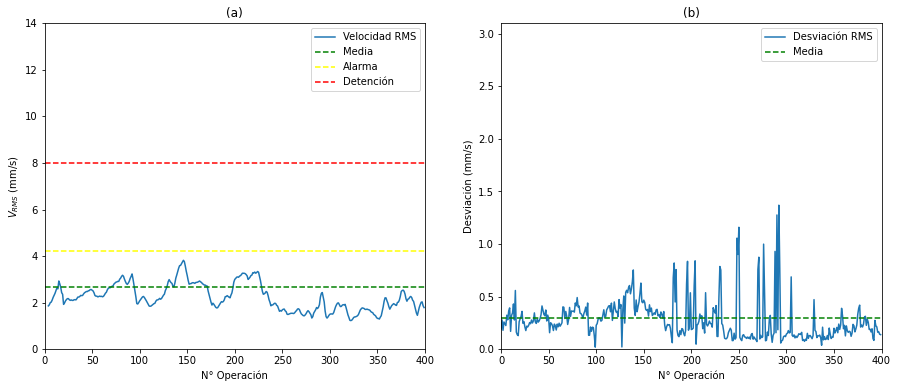

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Graf 1 Velocidad media RMS 4h
axes[0].plot(rolling_mean[:400], label='Velocidad RMS')
axes[0].axhline(media_4h, color='g', linestyle='dashed', label='Media')
axes[0].set_title("(a)")
axes[0].set_xlim(0, 400)
axes[0].set_ylim(0, 14)
axes[0].set_xlabel("N° Operación")
axes[0].set_ylabel("$V_{RMS}$ (mm/s)")

# Graf 2 STD Velocidad media RMS 4h
axes[1].plot(nuevo_4h_std[:400], label='Desviación RMS')
axes[1].set_xlim(0, 400)
axes[1].set_ylim(0, 3.1)
axes[1].axhline(std_4h, color='g', linestyle='dashed', label='Media')
axes[1].set_title("(b)")
axes[1].set_xlabel("N° Operación")
axes[1].set_ylabel("Desviación (mm/s)")
axes[1].legend(loc='upper right')

# Valores alarma y parada calculados
axes[0].axhline(alarma, color='yellow', linestyle='dashed', label='Alarma')
axes[0].axhline(detencion, color='r', linestyle='dashed', label='Detención')

axes[0].legend(loc='upper right')

plt.savefig('Severidad_4H.png', dpi=600)


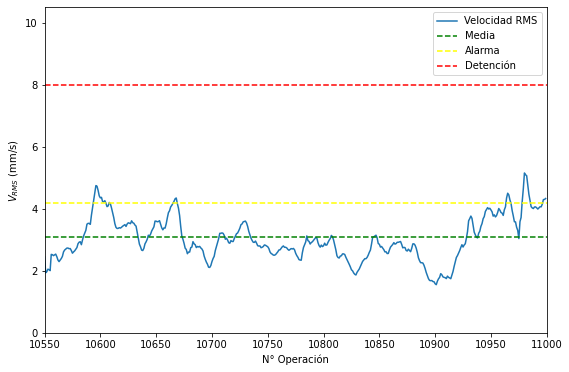

In [27]:
fig = plt.figure(figsize=(9, 6))

#550:1101
#1500:11000
#

n1=10550
n2=11000


plt.plot(rolling_mean[n1:n2], label='Velocidad RMS')
plt.axhline(3.09, color='g', linestyle='dashed', label='Media')
plt.xlim(n1,n2)
plt.ylim(0, 10.5)
plt.xlabel("N° Operación")
plt.ylabel("$V_{RMS}$ (mm/s)")

# Valores alarma y parada calculados
plt.axhline(alarma, color='yellow', linestyle='dashed', label='Alarma')
plt.axhline(detencion, color='r', linestyle='dashed', label='Detención')

plt.legend(loc='upper right')
plt.savefig('Severidad_4H.png', dpi=300)
plt.savefig('Severidad_4H.svg', format='svg')
plt.show()